<a href="https://colab.research.google.com/github/NoraGraves/AIAttackDemo/blob/main/FacialRecognitionDemonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

We need to import all of these code libraries in order to format our own photos, and to use the pretrained neural network.

In [ ]:
%%capture
%pip install opencv-python
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 "shape_predictor_68_face_landmarks.dat.bz2"

Now we will clone the repository in Github containing all of the code and sample images we will need.

In [ ]:
%%capture
!git clone 'https://github.com/NoraGraves/AIAttackDemo.git'

In [ ]:
import AIAttackDemo.image_processing as image_processing
import AIAttackDemo.neural_net as neural_net
import AIAttackDemo.attack as attack

from google.colab.patches import cv2_imshow as show_image

# Upload and crop an image of your face!

The first step is to upload an image of your face to this Colab notebook. If you don't feel comfortable using your own face, any picture with a face in it will work.

**Make sure there is only one face in the image!**

In [ ]:
from google.colab import files
uploaded=files.upload()

filepath = ''
for key in uploaded.keys():
    filepath = f'/content/{key}'

Saving IMG_0000.jpg to IMG_0000.jpg


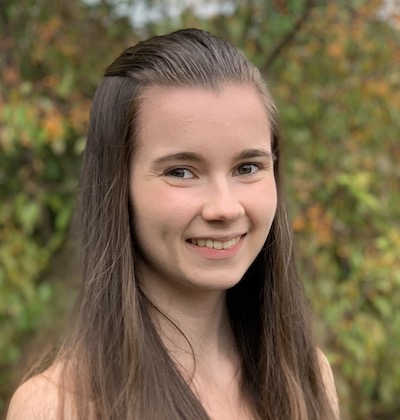

In [ ]:
# Check that the image uploaded correctly by displaying it here!
show_image(image_processing.read_image_from_file(filepath))

Our neural network was trained on pictures of faces that were all in the same format: a square 224x224 image with the face centered inside. Therefore, in order to use your own face as input, you must make sure your picture is in that same format.

The following code will detect the face in the image and crop the image around it.

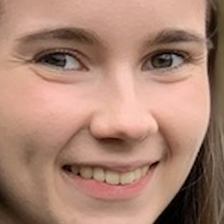

In [ ]:
# Here, we crop the image and then display it
crop_image = image_processing.crop_image_from_file(filepath)
show_image(crop_image)

# Who do you look like?

In [ ]:
# Upload the model
model = neural_net.load_model_from_file('/content/AIAttackDemo/celeb_faces.model.keras')


It's finally time to run the program, and find out which celebrity you look like!

NOTE: This is a very simple neural network, so the results will not always be perfect. For example, it may say you look like a celebrity of a different gender. Please don't be offended!

In [ ]:
# Turn the image into an input the model can understand
model_input = image_processing.preprocess_image(crop_image)
prediction = neural_net.predict(model_input, model)
show_image(image_processing.read_image_from_file(neural_net.index2filepath(prediction)))

1/1 [==============================] - 1s 1s/step
You look like Greta Thunberg!


# Time to attack the model!

We will now add noise to the image, so that the model identifies the same person as a different celebrity.

In [ ]:
# Prints the celebrity options
print(('\n').join(neural_net.INDEX_2_NAME))

Pick a celebrity from above, then copy and paste the name where it says `'celeb name here'`

In [ ]:
target_name = 'celeb name here'

In [ ]:
target_name = "Alica Schmidt" # @param ['Alica Schmidt', 'Angela Merkel', 'Barack Obama','Bruno Mars', 'Dwayne Johnson', 'Ed Sheeran', 'Emma Stone', 'Greta Thunberg', 'Jackie Chan','Malala', 'Manuel Neuer', 'Mark Forster','Michael Jordan', 'Namika', 'Olaf Schulz','Olivia Rodrigo', 'Rihanna', 'Ryan Gosling','Sandra Oh', 'Serena Williams', 'Simu Lui', 'Zendaya']

sel_index = neural_net.name2index(target_name)
show_image(image_processing.read_image_from_file(neural_net.index2filepath(sel_index)))



Run the attack!

NOTE: This typically takes around 15 minutes

In [ ]:
attack_image = attack.targeted_attack(model, crop_image, target_name)

Let's look at the image, and then see what the model predicts!

In [ ]:
show_image(attack_image)

In [ ]:
attack_input = image_processing.preprocess_image(attack_image)
neural_net.predict(attack_input, model)

# Further Exploration

Within these functions, there are many parameters that can be adapted. Here are a few ideas:
* Use different input images and see how the model behaves
* Upload a different trained keras model and run the same attack.
* Adjust how much the attack changes the picture. Right now, the function runs 400 steps automatically, but `attack.targeted_attack(model, crop_image, target_name, steps=N)` will run N steps instead. This will affect how long the attack takes, how "strange" the image looks, and how likely it is that the model will predict the target celebrity
* Use the function `neural_net.print_all_probs(attack_input, model)` to see how similar the model thinks an image is to *all* the celebrity options. If the target has a lower probability, the attack will typically require more steps to be successful!